# UCI Online Retail II dataset - ML Clusters

## Dataset Context
This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

<br>

## Dataset Content
Attribute Information:

- InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
- UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal. The name of the country where a customer resides.

<br>

#### Reference
https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

**Main Target**
- Apply Machine Learning Algorithm to cluster customers into groups.

In [1]:
# import library
import pandas as pd
import numpy as np
import datetime as dt

# Data Viusalization
import matplotlib.pyplot as plt
import seaborn as sns

# K-means clustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


In [2]:
detail = pd.read_csv("cleaned_data_all\customergroup_details.csv")

In [3]:
detail[["CustomerID","Recency","Frequency","MonetaryValue"]]

,CustomerID,Recency,Frequency,MonetaryValue
0,13085.0,158,84,2433.28
1,13085.0,158,84,2433.28
2,13085.0,158,84,2433.28
3,13085.0,158,84,2433.28
4,13085.0,158,84,2433.28
...,...,...,...,...
779420,12713.0,1,38,848.55
779421,12713.0,1,38,848.55
779422,12713.0,1,38,848.55
779423,12713.0,1,38,848.55


In [4]:
detail_df = detail.groupby("CustomerID").agg({"Recency":"mean", "Frequency":"min", "MonetaryValue":["mean","count"]}).round(2)
detail_df

Recency Frequency MonetaryValue      
              mean       min          mean count
CustomerID                                      
12346.0        326        34      77556.46    34
12347.0          3       222       4921.53   222
12348.0         76        51       2019.40    51
12349.0         19       175       4428.69   175
12350.0        311        17        334.40    17
...            ...       ...           ...   ...
18283.0          4       938       2664.90   938
18284.0        432        28        461.68    28
18285.0        661        12        427.00    12
18286.0        477        67       1296.43    67
18287.0         43       155       4182.99   155

[5878 rows x 4 columns]

**Approach**
1. Get the R F M into dataframe 
2. Check the distribution 
3. Remove outliners (if necessary)
4. Scaling the data (if necessary)
5. Check the best numbers of clusters in K-means with ssd (with line plot)
6. Take Silhouette Analysis (if necessary) (with line plot)
7. Categorize data into k-clusters
8. Check the distribution and RFM scores

In [5]:
detail_final = pd.DataFrame(index=list(detail_df.index))

In [6]:
detail_final["Recency"] = detail_df["Recency"]["mean"]
detail_final["Frequency"] = detail_df["Frequency"]["min"]
detail_final["MonetaryValue"] = detail_df["MonetaryValue"]["mean"]


In [7]:
detail_final

,Recency,Frequency,MonetaryValue
12346.0,326,34,77556.46
12347.0,3,222,4921.53
12348.0,76,51,2019.40
12349.0,19,175,4428.69
12350.0,311,17,334.40
...,...,...,...
18283.0,4,938,2664.90
18284.0,432,28,461.68
18285.0,661,12,427.00
18286.0,477,67,1296.43


In [8]:
from eda_function import *

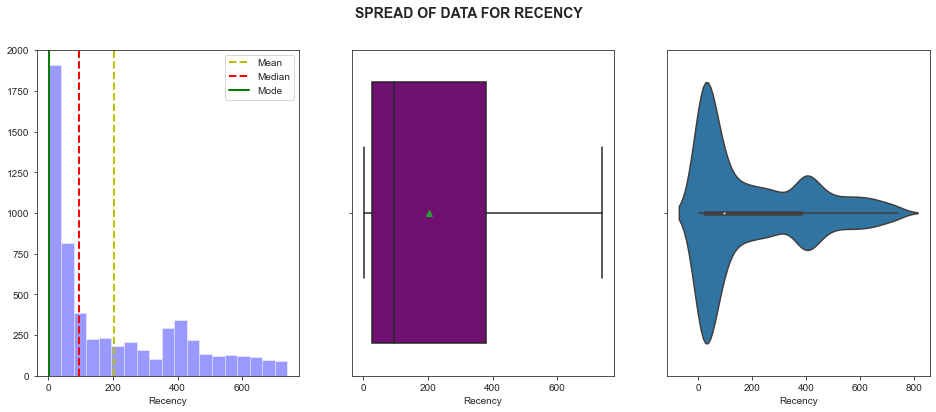

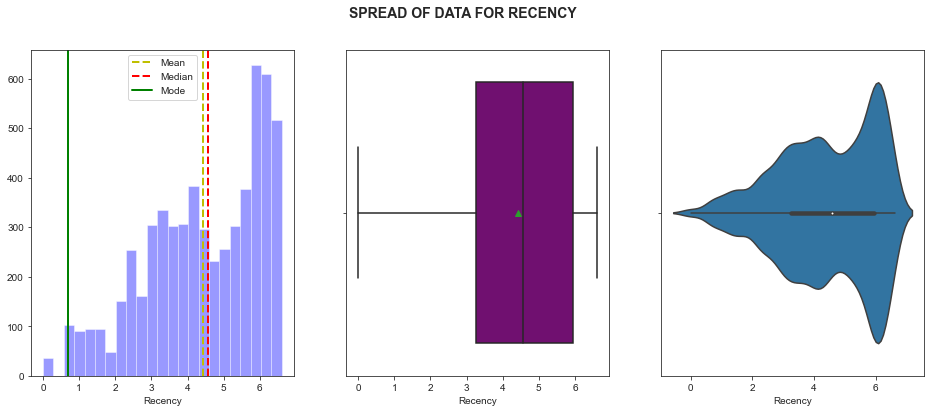

In [9]:
dist_box_violin(detail_final["Recency"])
dist_box_violin(np.log(detail_final["Recency"]))

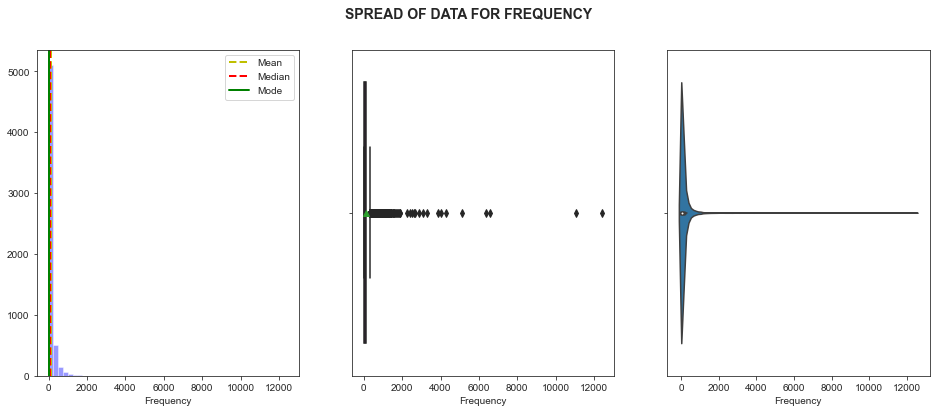

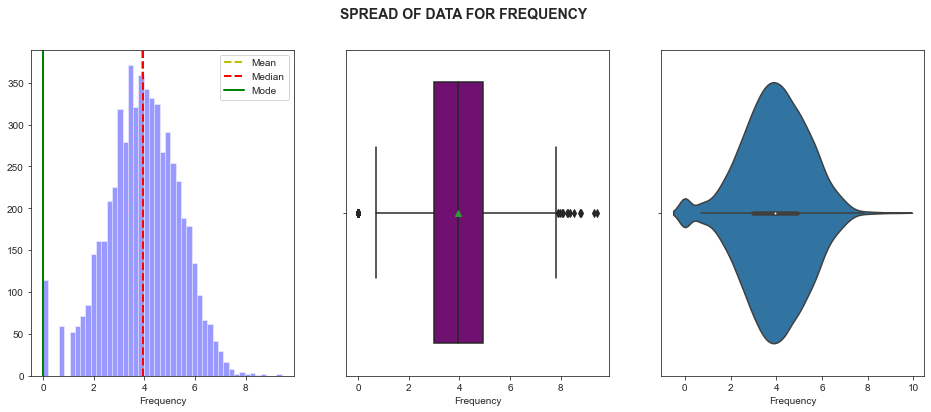

In [10]:
dist_box_violin(detail_final["Frequency"])
dist_box_violin(np.log(detail_final["Frequency"]))

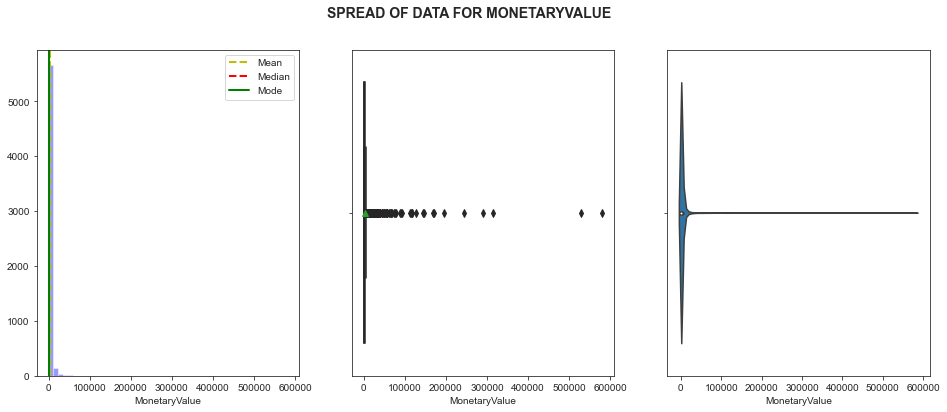

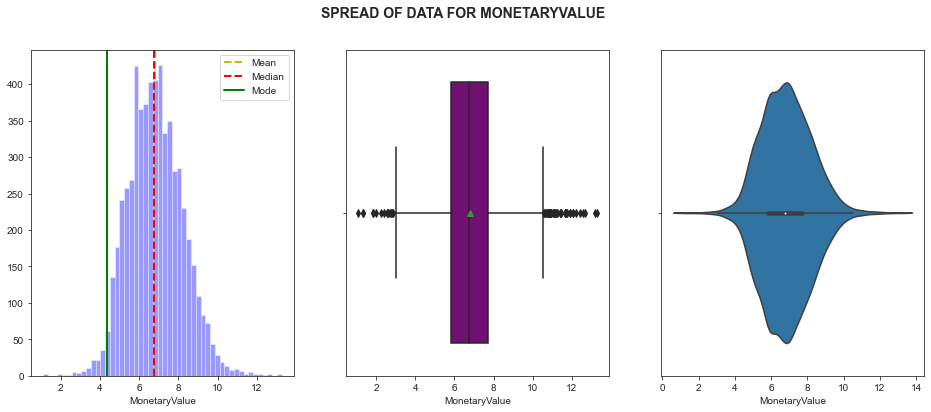

In [11]:
dist_box_violin(detail_final["MonetaryValue"] )
dist_box_violin(np.log(detail_final["MonetaryValue"]))

In [12]:
# Scaling down for better visualize
from sklearn.preprocessing import RobustScaler
detail_scaling = detail_final.copy()

In [13]:
detail_scaling

,Recency,Frequency,MonetaryValue
12346.0,326,34,77556.46
12347.0,3,222,4921.53
12348.0,76,51,2019.40
12349.0,19,175,4428.69
12350.0,311,17,334.40
...,...,...,...
18283.0,4,938,2664.90
18284.0,432,28,461.68
18285.0,661,12,427.00
18286.0,477,67,1296.43


In [14]:
# apply robustscaler
# scaler = RobustScaler()

# detail_scaling = scaler.fit_transform(detail_scaling)
# detail_scaling = pd.DataFrame(detail_scaling)
# detail_scaling.columns = ["Recency","Frequency","MonetaryValue"]
# detail_scaling

# detail_scaling["Recency"] = scaler.fit_transform(detail_scaling[["Recency"]])
# detail_scaling["Frequency"] = scaler.fit_transform(detail_scaling[["Frequency"]])
# detail_scaling["MonetaryValue"] = scaler.fit_transform(detail_scaling[["MonetaryValue"]])


In [15]:
detail_scaling

,Recency,Frequency,MonetaryValue
12346.0,326,34,77556.46
12347.0,3,222,4921.53
12348.0,76,51,2019.40
12349.0,19,175,4428.69
12350.0,311,17,334.40
...,...,...,...
18283.0,4,938,2664.90
18284.0,432,28,461.68
18285.0,661,12,427.00
18286.0,477,67,1296.43


In [16]:
# Removing outliers 
detail_final_train = detail_scaling.copy()

# Removing outliers for Monetary
Q1 = detail_final_train.Recency.quantile(0.05)
Q3 = detail_final_train.Recency.quantile(0.95)
IQR = Q3 - Q1
detail_final_train = detail_final_train[(detail_final_train.Recency >= Q1 - 1.5*IQR) & (detail_final_train.Recency <= Q3 + 1.5*IQR)]

# Removing outliers for Recency
Q1 = detail_final_train.Frequency.quantile(0.05)
Q3 = detail_final_train.Frequency.quantile(0.95)
IQR = Q3 - Q1
detail_final_train = detail_final_train[(detail_final_train.Frequency >= Q1 - 1.5*IQR) & (detail_final_train.Frequency <= Q3 + 1.5*IQR)]

# Removing outliers for Frequency
Q1 = detail_final_train.MonetaryValue.quantile(0.05)
Q3 = detail_final_train.MonetaryValue.quantile(0.95)
IQR = Q3 - Q1
detail_final_train = detail_final_train[(detail_final_train.MonetaryValue >= Q1 - 1.5*IQR) & (detail_final_train.MonetaryValue <= Q3 + 1.5*IQR)]


In [17]:
detail_final_train.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5759 entries, 12347.0 to 18287.0
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Recency        5759 non-null   int64  
 1   Frequency      5759 non-null   int64  
 2   MonetaryValue  5759 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 180.0 KB


In [18]:
detail_final_train.sample(5)

,Recency,Frequency,MonetaryValue
15602.0,9,125,3137.96
16944.0,610,7,101.36
15560.0,398,10,153.52
14665.0,61,132,2749.65
18204.0,72,192,1975.35


### K-Means

In [19]:
temp = []

for n_clusters in list(range(2,11)):
      cluster = KMeans(n_clusters = n_clusters, max_iter = 100, n_jobs=-1)
      cluster.fit(detail_final_train)
      
      temp.append(cluster.inertia_)
      # time.append(cluster.labels_)
      # silhouette_avg.append(silhouette_score(df_cluster_scaled,cluster.labels_))

Text(0.5, 1.0, 'SSD by no. of Clusters')

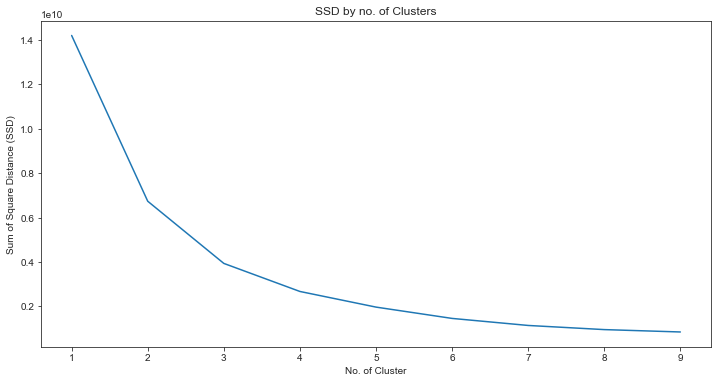

In [20]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(1,10),temp)
plt.xlabel("No. of Cluster")
plt.ylabel("Sum of Square Distance (SSD)")
plt.title("SSD by no. of Clusters")

In [21]:
# for n_clusters in list(range(2,10)):
#       cluster = KMeans(n_clusters = n_clusters, max_iter = 50, n_jobs=-1,verbose=1)
#       cluster.fit(df_cluster_scaled)
#       silhouette_avg = silhouette_score(df_cluster_scaled,cluster.labels_)
#       print(f"For Clusters = {n_clusters}\t, silhouette score = {silhouette_avg}")

Text(0, 0.5, 'Silhouette score (1-best,0-worst)')

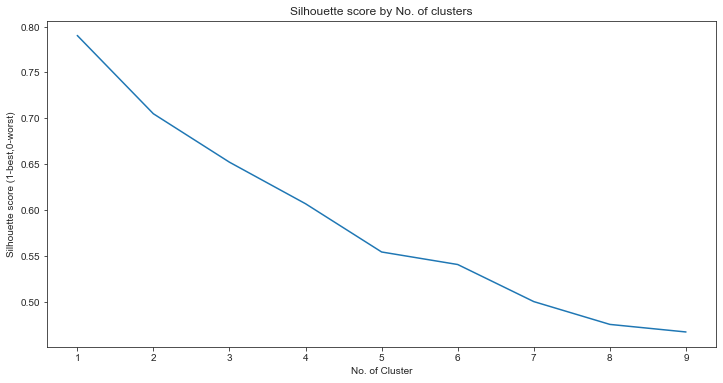

In [22]:
from sklearn.metrics import silhouette_score

silhouette_avg = []

for n_clusters in list(range(2,11)):
      cluster = KMeans(n_clusters = n_clusters, max_iter = 100, n_jobs=-1)
      cluster.fit(detail_final_train)
      silhouette_avg.append(silhouette_score(detail_final_train,cluster.labels_)) 

plt.figure(figsize=(12,6))
plt.plot(range(1,10), silhouette_avg)
plt.title("Silhouette score by No. of clusters")
plt.xlabel("No. of Cluster")
plt.ylabel("Silhouette score (1-best,0-worst)")


From the SSD and Silhouette score, we will go for 3 clusters.

In [23]:
km = KMeans(n_clusters = 3, max_iter = 100, n_jobs=-1)
detail_final_train["label"] = km.fit_predict(detail_final_train)


In [24]:
detail_final_train["label"].value_counts().sort_index()

0    4600
1     226
2     933
Name: label, dtype: int64

In [25]:
detail_final_train.columns

Index(['Recency', 'Frequency', 'MonetaryValue', 'label'], dtype='object')

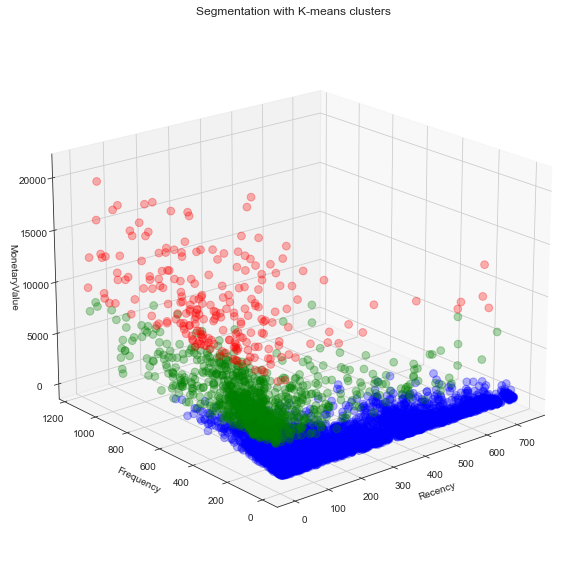

In [26]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(detail_final_train.Recency[detail_final_train.label == 0], detail_final_train.Frequency[detail_final_train.label == 0], detail_final_train.MonetaryValue[detail_final_train.label == 0], c='blue', s=60, alpha=0.3)
ax.scatter(detail_final_train.Recency[detail_final_train.label == 1], detail_final_train.Frequency[detail_final_train.label == 1], detail_final_train.MonetaryValue[detail_final_train.label == 1], c='red', s=60, alpha=0.3)
ax.scatter(detail_final_train.Recency[detail_final_train.label == 2], detail_final_train.Frequency[detail_final_train.label == 2], detail_final_train.MonetaryValue[detail_final_train.label == 2], c='green', s=60, alpha=0.3)
# ax.scatter(detail_final_train.Recency[detail_final_train.label == 3], detail_final_train.Frequency[detail_final_train.label == 3], detail_final_train.MonetaryValue[detail_final_train.label == 3], c='orange', s=60, alpha=0.5)
# ax.scatter(detail_final_train.Recency[detail_final_train.label == 4], detail_final_train.Frequency[detail_final_train.label == 4], detail_final_train.MonetaryValue[detail_final_train.label == 4], c='grey', s=60, alpha=0.5)
# ax.scatter(detail_final_train.Recency[detail_final_train.label == 5], detail_final_train.Frequency[detail_final_train.label == 5], detail_final_train.MonetaryValue[detail_final_train.label == 5], c='purple', s=60, alpha=0.5)

ax.view_init(20, 230)
plt.title("Segmentation with K-means clusters")
plt.xlabel("Recency")
plt.ylabel("Frequency")
ax.set_zlabel('MonetaryValue')
plt.show()

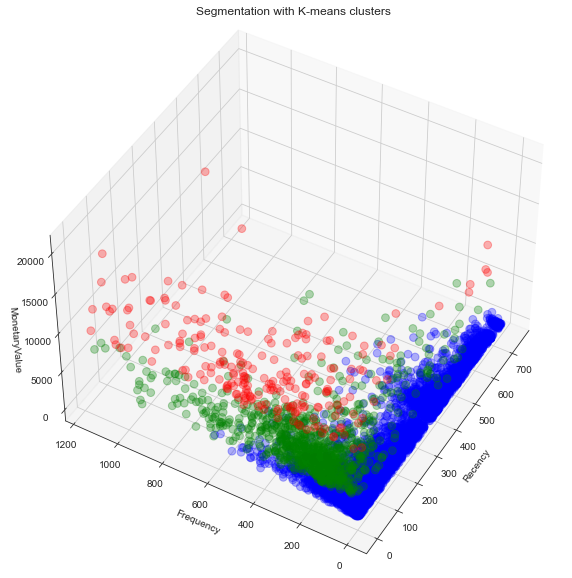

In [27]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(detail_final_train.Recency[detail_final_train.label == 0], detail_final_train.Frequency[detail_final_train.label == 0], detail_final_train.MonetaryValue[detail_final_train.label == 0], c='blue', s=60, alpha=0.3)
ax.scatter(detail_final_train.Recency[detail_final_train.label == 1], detail_final_train.Frequency[detail_final_train.label == 1], detail_final_train.MonetaryValue[detail_final_train.label == 1], c='red', s=60, alpha=0.3)
ax.scatter(detail_final_train.Recency[detail_final_train.label == 2], detail_final_train.Frequency[detail_final_train.label == 2], detail_final_train.MonetaryValue[detail_final_train.label == 2], c='green', s=60, alpha=0.3)
# ax.scatter(detail_final_train.Recency[detail_final_train.label == 3], detail_final_train.Frequency[detail_final_train.label == 3], detail_final_train.MonetaryValue[detail_final_train.label == 3], c='orange', s=60, alpha=0.5)
# ax.scatter(detail_final_train.Recency[detail_final_train.label == 4], detail_final_train.Frequency[detail_final_train.label == 4], detail_final_train.MonetaryValue[detail_final_train.label == 4], c='grey', s=60, alpha=0.5)
# ax.scatter(detail_final_train.Recency[detail_final_train.label == 5], detail_final_train.Frequency[detail_final_train.label == 5], detail_final_train.MonetaryValue[detail_final_train.label == 5], c='purple', s=60, alpha=0.5)

ax.view_init(45, 210)

plt.title("Segmentation with K-means clusters")
plt.xlabel("Recency")
plt.ylabel("Frequency")
ax.set_zlabel('MonetaryValue')
plt.show()

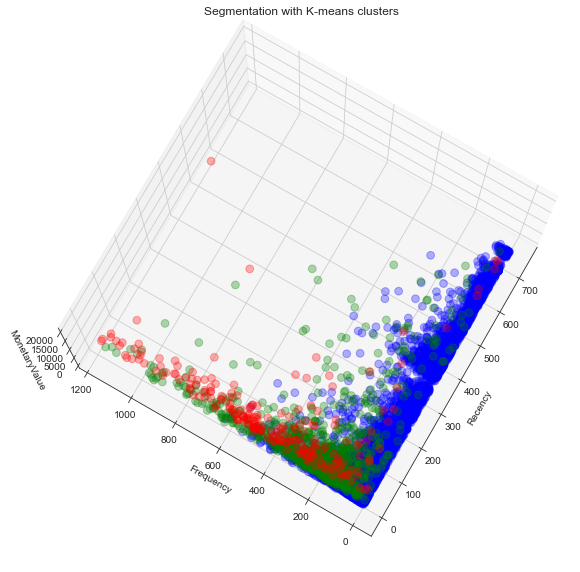

In [28]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(detail_final_train.Recency[detail_final_train.label == 0], detail_final_train.Frequency[detail_final_train.label == 0], detail_final_train.MonetaryValue[detail_final_train.label == 0], c='blue', s=60, alpha=0.3)
ax.scatter(detail_final_train.Recency[detail_final_train.label == 1], detail_final_train.Frequency[detail_final_train.label == 1], detail_final_train.MonetaryValue[detail_final_train.label == 1], c='red', s=60, alpha=0.3)
ax.scatter(detail_final_train.Recency[detail_final_train.label == 2], detail_final_train.Frequency[detail_final_train.label == 2], detail_final_train.MonetaryValue[detail_final_train.label == 2], c='green', s=60, alpha=0.3)
# ax.scatter(detail_final_train.Recency[detail_final_train.label == 3], detail_final_train.Frequency[detail_final_train.label == 3], detail_final_train.MonetaryValue[detail_final_train.label == 3], c='orange', s=60, alpha=0.5)
# ax.scatter(detail_final_train.Recency[detail_final_train.label == 4], detail_final_train.Frequency[detail_final_train.label == 4], detail_final_train.MonetaryValue[detail_final_train.label == 4], c='grey', s=60, alpha=0.5)
# ax.scatter(detail_final_train.Recency[detail_final_train.label == 5], detail_final_train.Frequency[detail_final_train.label == 5], detail_final_train.MonetaryValue[detail_final_train.label == 5], c='purple', s=60, alpha=0.5)

ax.view_init(80, 210)

plt.title("Segmentation with K-means clusters")
plt.xlabel("Recency")
plt.ylabel("Frequency")
ax.set_zlabel('MonetaryValue')
plt.show()

**From the above graph, we can find out that:**
- Label 0 = Middle group in Monetary Value
- Label 1 = Lowest Monetary Value (mostly under $5,000), also lower in Frequency 
- Label 2 = Highest Monetary Value (mostly above $10,000), lower Recency (mostly lower than 100)